# **COVID19 outcome Predictive Model**

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("latestdata.csv")

## Exploratory Data Anaylsis

In [3]:
# lets try to look the data
df.head()

ID  age     sex            city   province    country   latitude  \
0      000-1-1  NaN    male        Shek Lei  Hong Kong      China  22.365019   
1     000-1-10   78    male      Vo Euganeo     Veneto      Italy  45.297748   
2    000-1-100   61  female             NaN        NaN  Singapore   1.353460   
3   000-1-1000  NaN     NaN  Zhengzhou City      Henan      China  34.629310   
4  000-1-10000  NaN     NaN  Pingxiang City    Jiangxi      China  27.513560   

    longitude geo_resolution date_onset_symptoms  ... date_death_or_discharge  \
0  114.133808          point                 NaN  ...                     NaN   
1   11.658382          point                 NaN  ...              22.02.2020   
2  103.815100         admin0                 NaN  ...              17.02.2020   
3  113.468000         admin2                 NaN  ...                     NaN   
4  113.902900         admin2                 NaN  ...                     NaN   

  notes_for_discussion     location admin3          admin2     admin1  \
0                  NaN     Shek Lei    NaN             NaN  Hong Kong   
1                  NaN  Vo' Euganeo    NaN             NaN     Veneto   
2                  NaN          NaN    NaN             NaN        NaN   
3                  NaN          NaN    NaN  Zhengzhou City      Henan   
4                  NaN          NaN    NaN  Pingxiang City    Jiangxi   

  country_new admin_id  data_moderator_initials travel_history_binary  
0       China   8029.0                      NaN                   NaN  
1       Italy   8954.0                      NaN                   NaN  
2   Singapore    200.0                      NaN                   NaN  
3       China  10091.0                      NaN                   NaN  
4       China   7060.0                      NaN                   NaN  

[5 rows x 33 columns]

In [4]:
# lets try to check the shape of data
df.shape

(2676311, 33)

In [5]:
# check the column names of data
print(df.columns.tolist())

['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'symptoms', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 'reported_market_exposure', 'additional_information', 'chronic_disease_binary', 'chronic_disease', 'source', 'sequence_available', 'outcome', 'date_death_or_discharge', 'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1', 'country_new', 'admin_id', 'data_moderator_initials', 'travel_history_binary']


In [6]:
# lets try to check the general information of all columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

In [7]:
# lets try to check the missing values of each column in a dataset 
df.isnull().sum()

ID                                0
age                         2098293
sex                         2096154
city                         977681
province                     452664
country                         115
latitude                         61
longitude                        61
geo_resolution                   61
date_onset_symptoms         2414712
date_admission_hospital     2560100
date_confirmation            108489
symptoms                    2674259
lives_in_Wuhan              2671973
travel_history_dates        2673700
travel_history_location     2667089
reported_market_exposure    2675242
additional_information      2630456
chronic_disease_binary            0
chronic_disease             2676096
source                       566964
sequence_available          2676299
outcome                     2368929
date_death_or_discharge     2673163
notes_for_discussion        2675671
location                    2662935
admin3                      2595877
admin2                      

## Descriptive Anaylsis

In [8]:
# The## Exploratory Data Anaylsis describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
# number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 
df.describe()

latitude     longitude      admin_id
count  2.676250e+06  2.676250e+06  2.676250e+06
mean   3.761411e+01  1.022147e+01  6.431159e+03
std    2.048751e+01  4.827708e+01  5.196783e+03
min   -5.480803e+01 -1.597276e+02  2.000000e+00
25%    2.899523e+01 -2.952140e+00  5.770000e+02
50%    4.418521e+01  9.172073e+00  6.345000e+03
75%    5.176213e+01  3.517355e+01  1.139100e+04
max    7.007180e+01  1.747400e+02  1.621100e+04

In [9]:
# In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest
# in the include parameter.
df.describe(include=['bool','object'])

ID     age     sex     city province  country geo_resolution  \
count      2676311  578018  580157  1698630  2223647  2676196        2676250   
unique     2676311     390       2     8530     1245      146              6   
top     002-119695   35-59    male   Moscow  Central    India          point   
freq             1   72775  307188   149478   206921   301207         971106   

       date_onset_symptoms date_admission_hospital date_confirmation  ...  \
count               261599                  116211           2567822  ...   
unique                 170                     162               178  ...   
top             20.03.2020              01.04.2020        26.03.2020  ...   
freq                  6735                    4784             48319  ...   

             outcome date_death_or_discharge           notes_for_discussion  \
count         307382                    3148                            640   
unique            34                     144                            203   
top     Hospitalized              30.05.2020  Could be some cases from 23rd   
freq          202475                      55                             91   

       location      admin3  admin2   admin1 country_new  \
count     13376       80434  826054  1257558     2645758   
unique      342         409    2085      616         145   
top      Jaipur  Birmingham  Moscow  Central       India   
freq       3545        3160  149476   200911      301207   

       data_moderator_initials travel_history_binary  
count                  1742983               2610732  
unique                      12                     2  
top                         TR                 False  
freq                   1169963               2579528  

[4 rows x 30 columns]

## Data Visualization

In [10]:
#list for catagorical columns
cat_cols = []
#list for numerical columns
num_cols = []
#list for binary columns
binary_cols = []

for i in df.columns:
    if df[i].dtypes =='object':
        cat_cols.append(i)        
    else:
        if df[i].nunique() == 2:
            binary_cols.append(i)
        else:
            num_cols.append(i) 

In [11]:
print(cat_cols)
print("Length of catagorical columns : ",len(cat_cols))

['ID', 'age', 'sex', 'city', 'province', 'country', 'geo_resolution', 'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'symptoms', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 'reported_market_exposure', 'additional_information', 'chronic_disease', 'source', 'sequence_available', 'outcome', 'date_death_or_discharge', 'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1', 'country_new', 'data_moderator_initials', 'travel_history_binary']
Length of catagorical columns :  29


In [12]:
print(num_cols)
print("Length of numerical columns : ",len(num_cols))

['latitude', 'longitude', 'admin_id']
Length of numerical columns :  3


In [13]:
print(binary_cols)
print("Length of binary columns : ",len(binary_cols))

['chronic_disease_binary']
Length of binary columns :  1


Length of catagorical columns :  29
Length of numerical columns :  3
Length of binary columns :  1


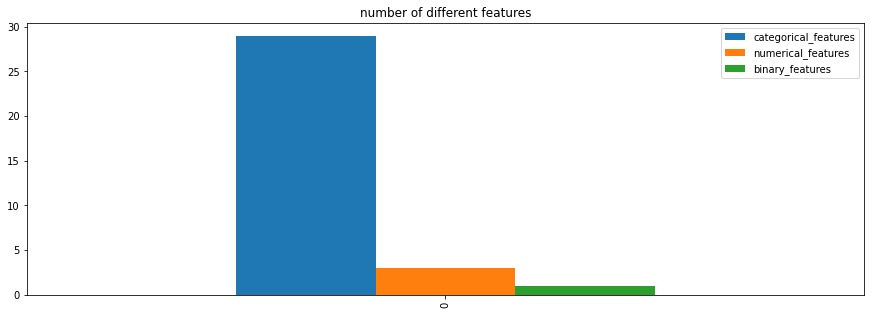

In [14]:
print("Length of catagorical columns : ",len(cat_cols))
print("Length of numerical columns : ",len(num_cols))
print("Length of binary columns : ",len(binary_cols))

categories_list = []
categories_list.append(len(cat_cols))
categories_list.append(len(num_cols))
categories_list.append(len(binary_cols))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="bar", figsize=(15, 5), title="number of different features")

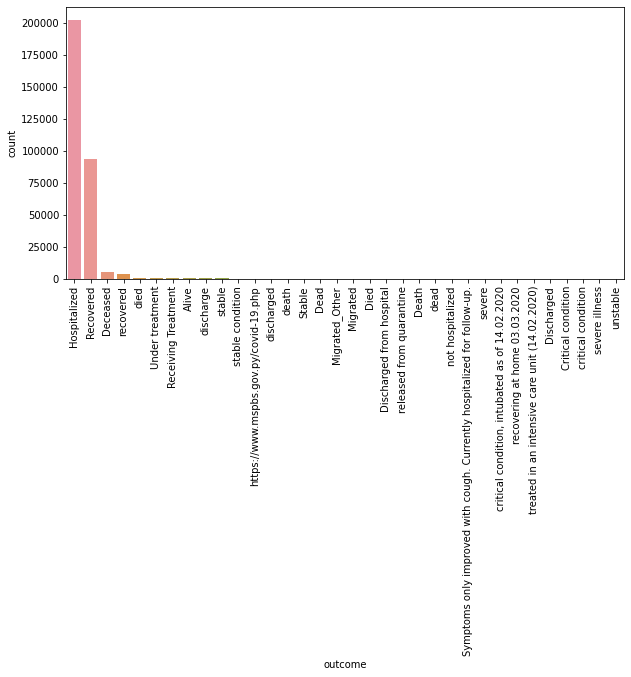

In [15]:
# lets try to check the distribution of target column outcome
plt.figure(figsize=(10,5))
sns.countplot(x = 'outcome', data=df,order=df['outcome'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

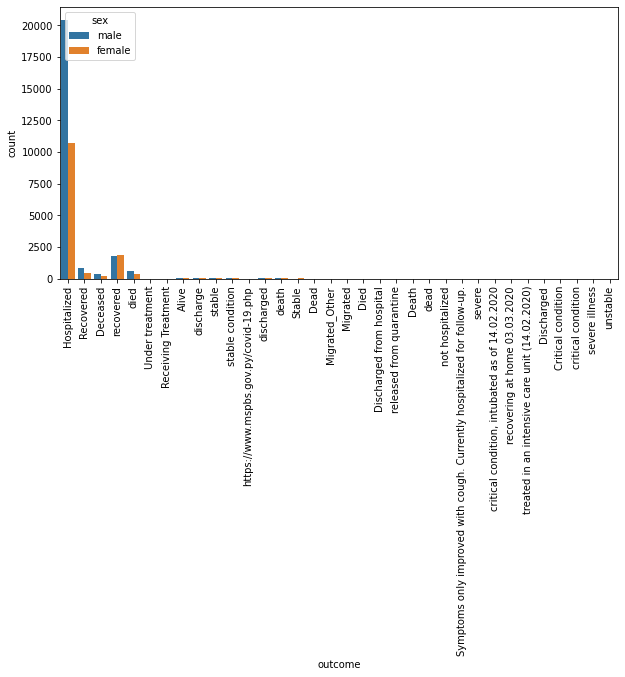

In [16]:
# lets try to check the distribution of target column sex
plt.figure(figsize=(10,5))
sns.countplot(x = 'outcome', data=df,hue='sex',order=df['outcome'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

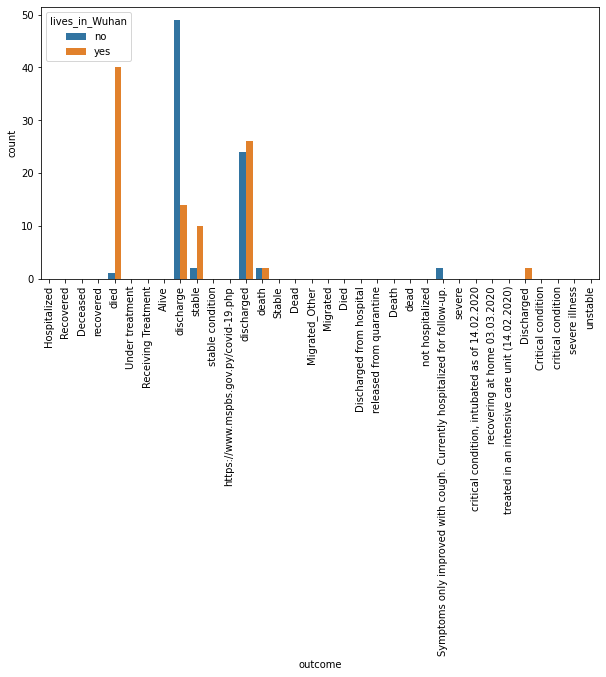

In [17]:
# lets try to check the distribution of target column with lives_in_Wuhan
plt.figure(figsize=(10,5))
sns.countplot(x = 'outcome', data=df,hue='lives_in_Wuhan',order=df['outcome'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

male      307188
female    272969
Name: sex, dtype: int64


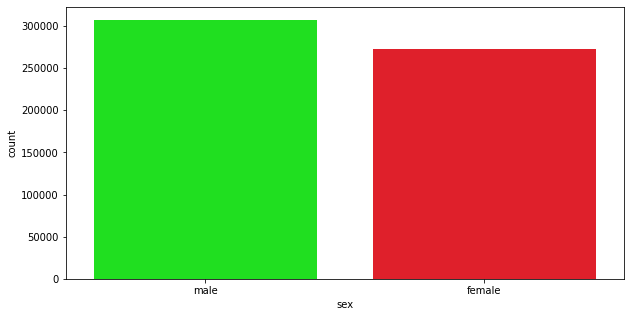

In [18]:
# lets try to check the distribution of sex column
print(df['sex'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x = 'sex', data=df, palette=['#00FF00','#FF000F'])
plt.show()

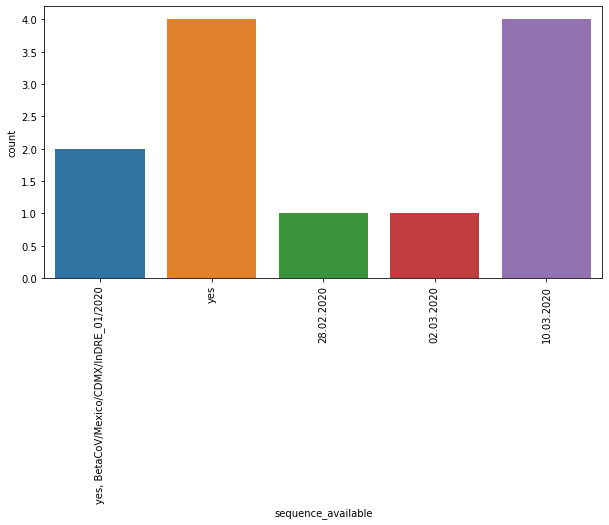

In [19]:
# lets try to check the distribution of sequence_available column
plt.figure(figsize=(10,5))
sns.countplot(x = 'sequence_available', data=df)
plt.xticks(rotation=90)
plt.show()

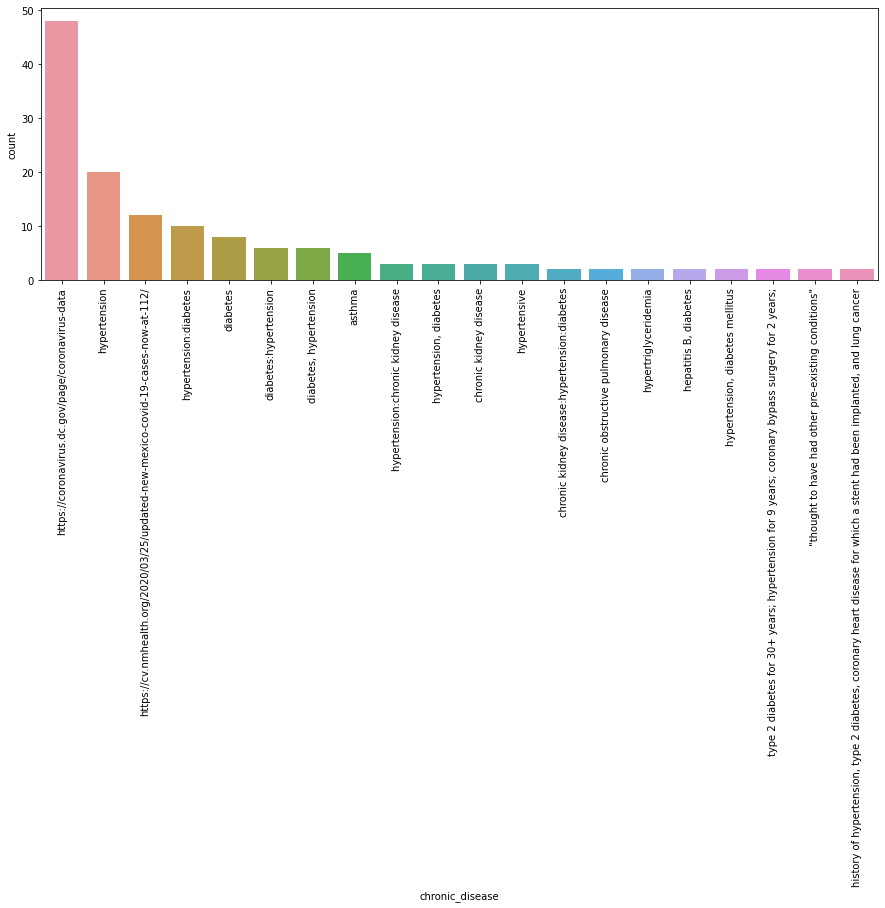

In [20]:
# lets try to check the distribution of top 20 chronic_disease column
plt.figure(figsize=(15,5))
sns.countplot(x = 'chronic_disease', data=df,order=df['chronic_disease'].value_counts().index[:20] )
plt.xticks(rotation=90)
plt.show()

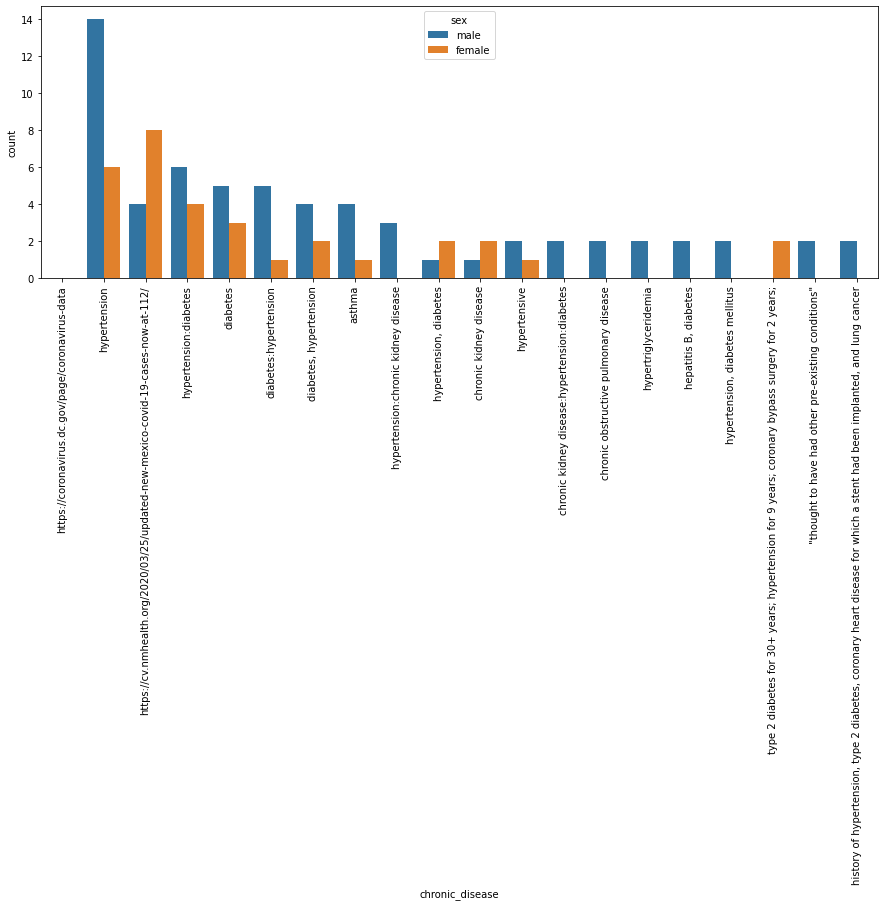

In [21]:
# lets try to check the distribution of top 20 chronic_disease column with sex column
plt.figure(figsize=(15,5))
sns.countplot(x = 'chronic_disease', hue='sex',data=df,order=df['chronic_disease'].value_counts().index[:20] )
plt.xticks(rotation=90)
plt.show()

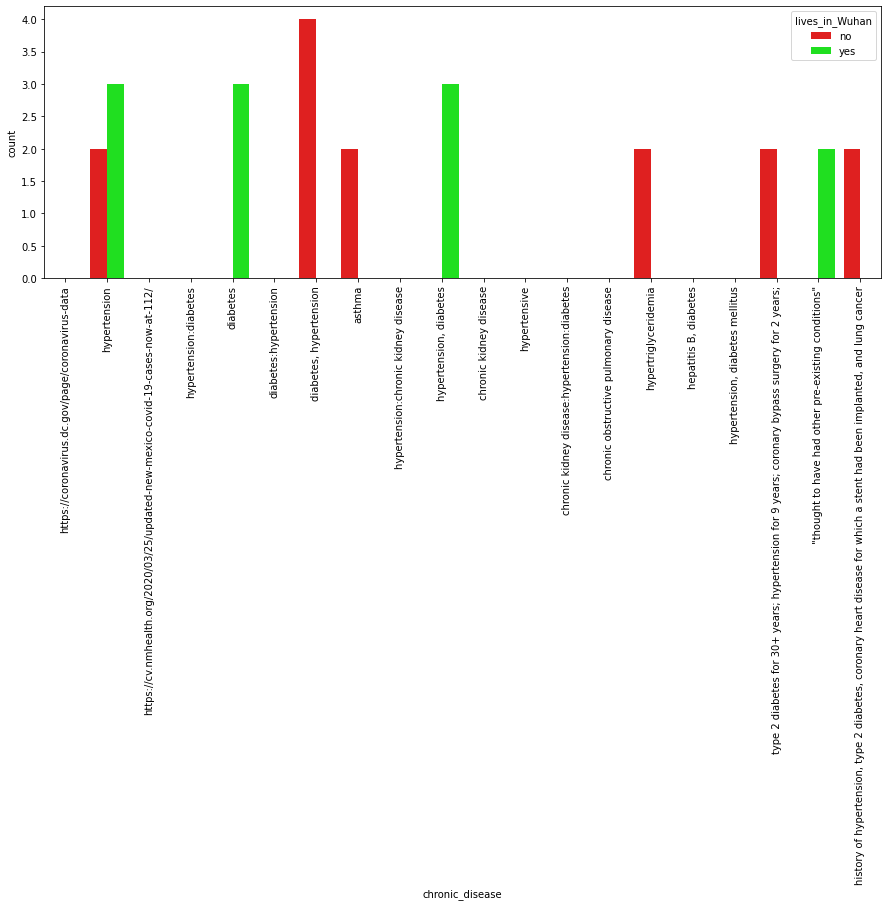

In [22]:
# lets try to check the distribution of top 20 chronic_disease column with lives_in_Wuhan column
plt.figure(figsize=(15,5))
sns.countplot(x = 'chronic_disease', hue='lives_in_Wuhan',data=df,order=df['chronic_disease'].value_counts().index[:20], palette=['#FF0000','#00FF00'] )
plt.xticks(rotation=90)
plt.show()

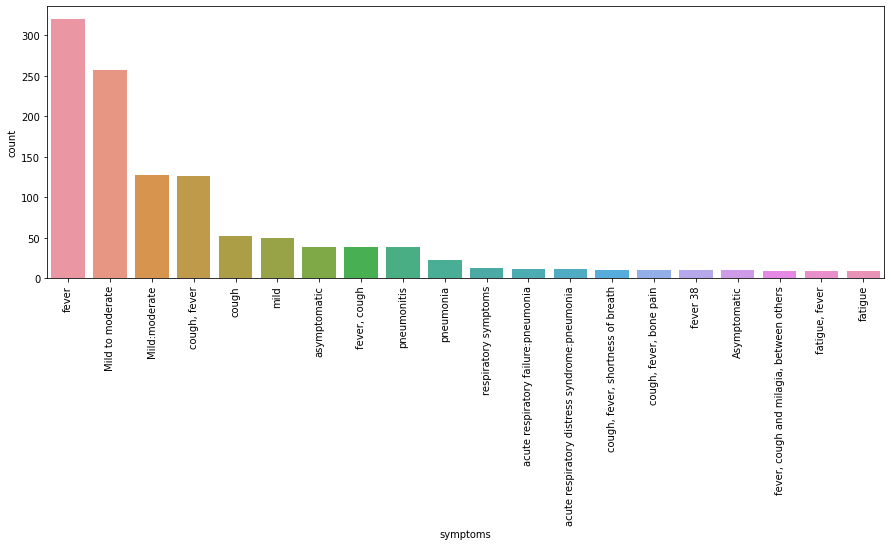

In [23]:
# lets try to check the distribution of top 20 symptoms column

plt.figure(figsize=(15,5))
sns.countplot(x = 'symptoms', data=df, order=df['symptoms'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

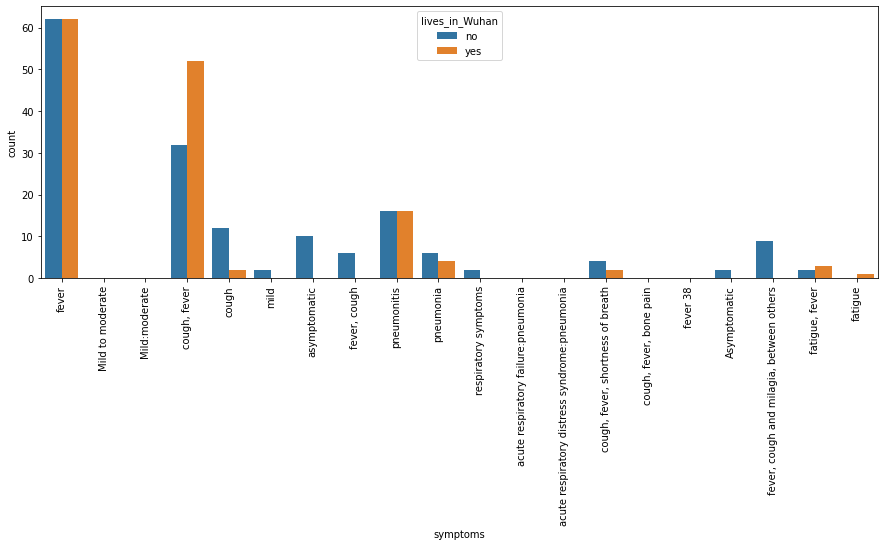

In [24]:
# lets try to check the distribution of top 20 symptoms column with lives_in_Wuhan column
plt.figure(figsize=(15,5))
sns.countplot(x = 'symptoms', data=df,hue='lives_in_Wuhan', order=df['symptoms'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

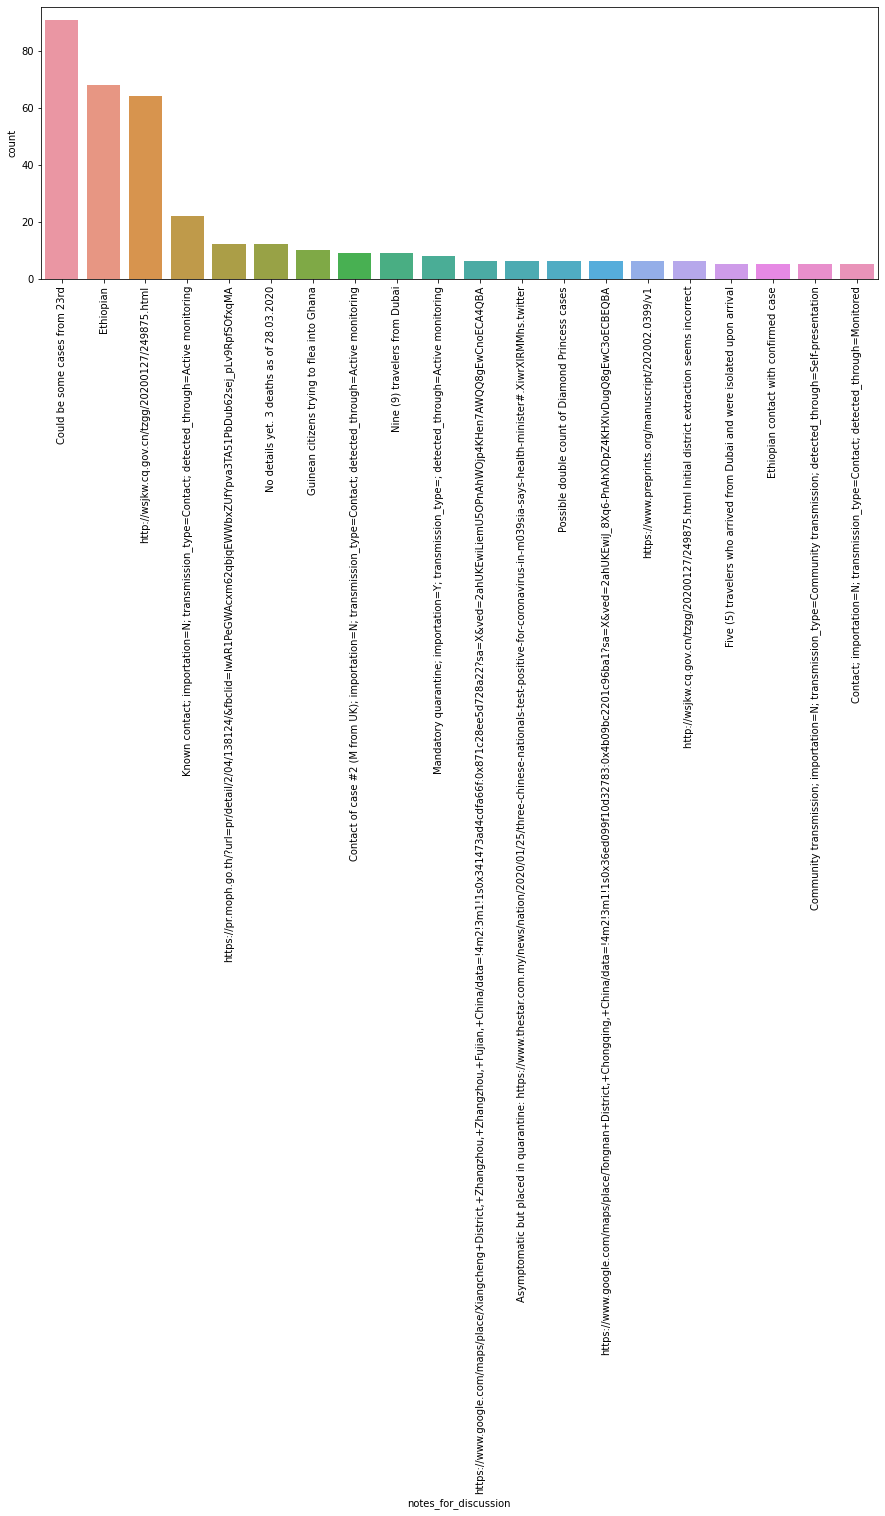

In [25]:
# lets try to check the distribution of top 20 notes_for_discussion column 
plt.figure(figsize=(15,5))
sns.countplot(x = 'notes_for_discussion', data=df, order=df['notes_for_discussion'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

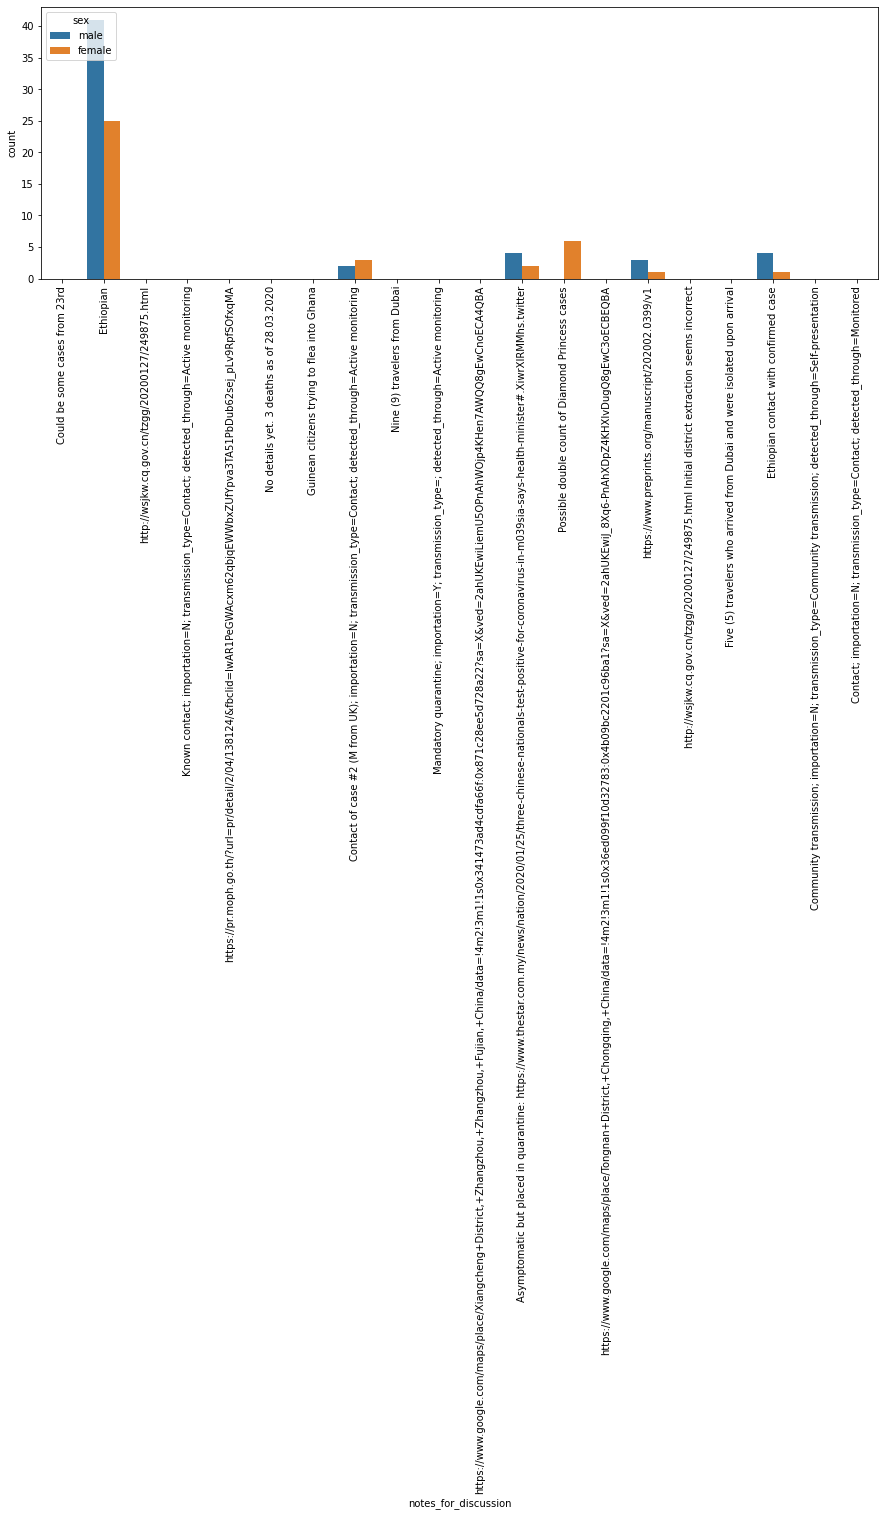

In [26]:
# lets try to check the distribution of top 20 notes_for_discussion column with sex column
plt.figure(figsize=(15,5))
sns.countplot(x = 'notes_for_discussion', data=df, hue='sex',order=df['notes_for_discussion'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

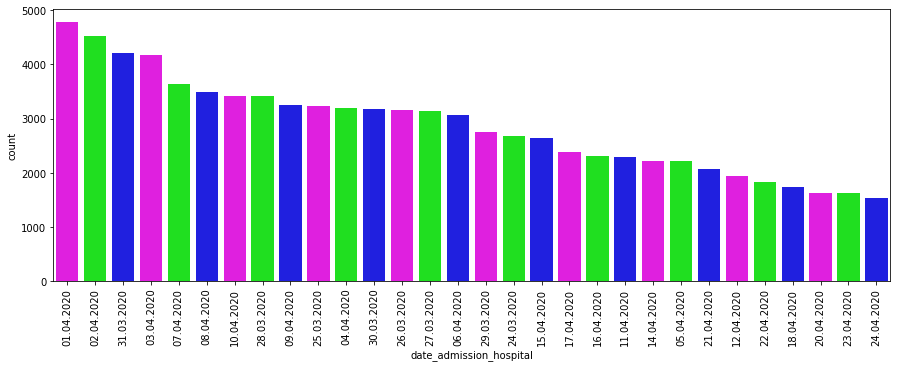

In [27]:
# lets try to check the distribution of top 30 date_admission_hospital column
plt.figure(figsize=(15,5))
sns.countplot(x = 'date_admission_hospital', data=df, order=df['date_admission_hospital'].value_counts().index[:30], palette = ['#FF00FF', '#00FF00', '#0000FF'])
plt.xticks(rotation=90)
plt.show()

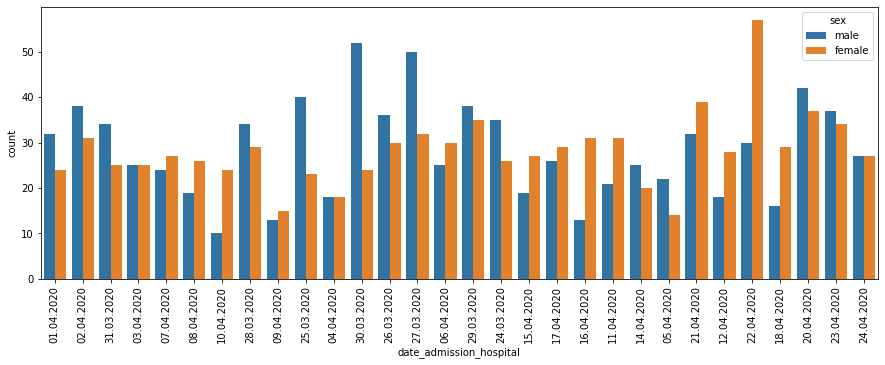

In [28]:
# lets try to check the distribution of top 30 date_admission_hospital column with sex column
plt.figure(figsize=(15,5))
sns.countplot(x = 'date_admission_hospital', data=df,hue='sex', order=df['date_admission_hospital'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

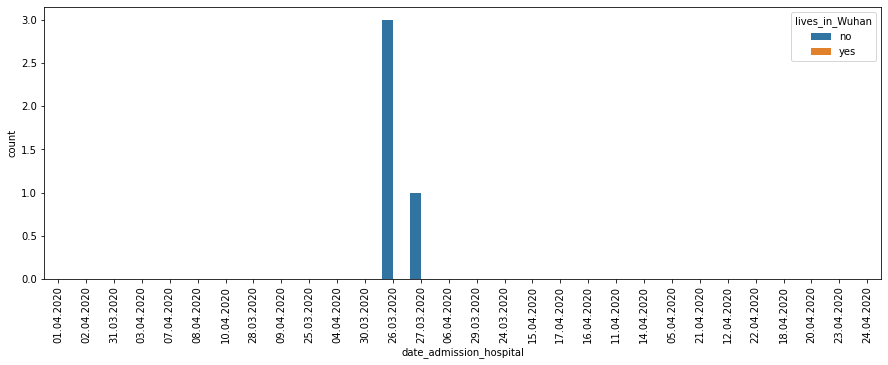

In [29]:
# lets try to check the distribution of top 30 date_admission_hospital column with lives_in_Wuhan column
plt.figure(figsize=(15,5))
sns.countplot(x = 'date_admission_hospital', data=df,hue='lives_in_Wuhan', order=df['date_admission_hospital'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

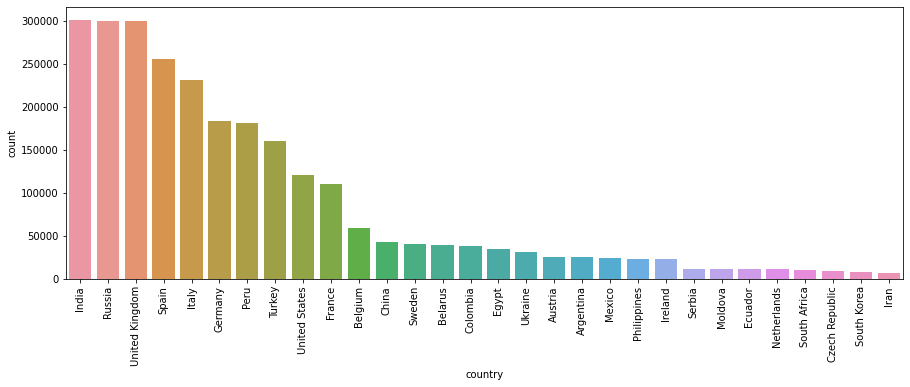

In [30]:
# lets try to check the distribution of top 30 country column
plt.figure(figsize=(15,5))
sns.countplot(x = 'country', data=df, order=df['country'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

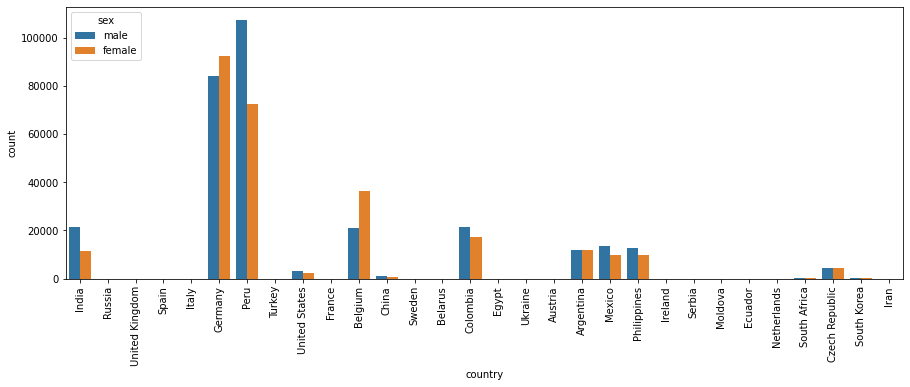

In [31]:
# lets try to check the distribution of top 30 country column with sex column
plt.figure(figsize=(15,5))
sns.countplot(x = 'country', data=df,hue='sex', order=df['country'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

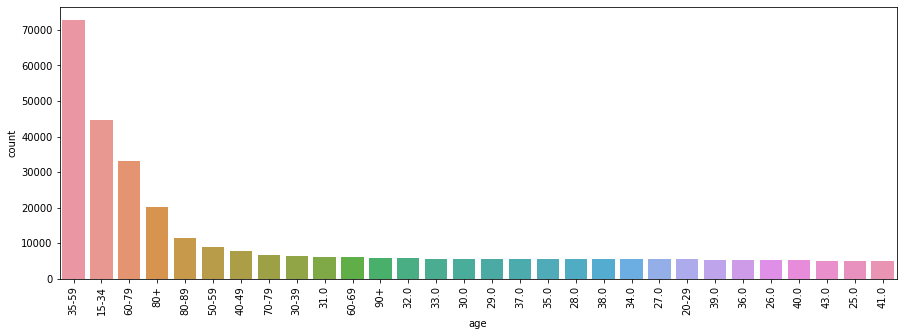

In [32]:
# lets try to check the distribution of top 30 age column
plt.figure(figsize=(15,5))
sns.countplot(x = 'age', data=df, order=df['age'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

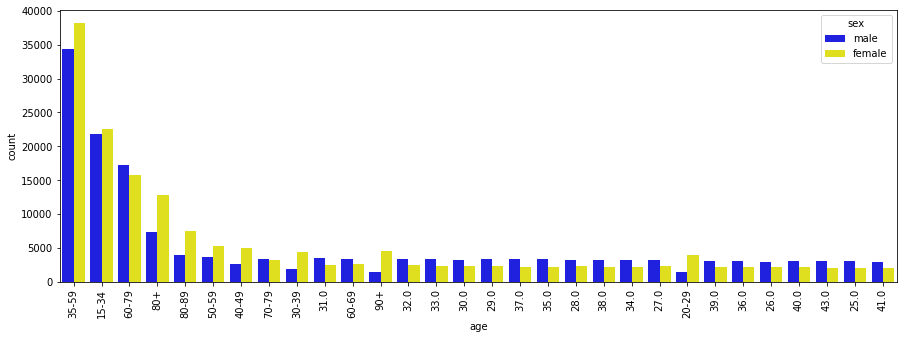

In [33]:
# lets try to check the distribution of top 30 age column with sex column
plt.figure(figsize=(15,5))
sns.countplot(x = 'age', data=df,hue='sex', order=df['age'].value_counts().index[:30], palette=['#0000FF','#FFFF00'])
plt.xticks(rotation=90)
plt.show()

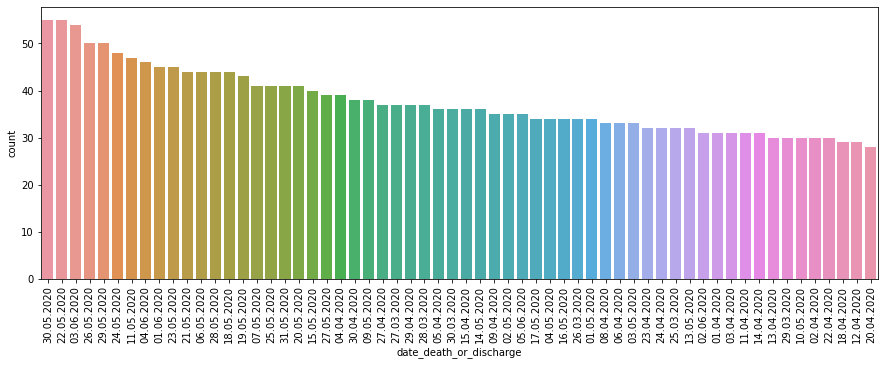

In [34]:
# lets try to check the distribution of top 60 date_death_or_discharge column
plt.figure(figsize=(15,5))
sns.countplot(x = 'date_death_or_discharge', data=df, order=df['date_death_or_discharge'].value_counts().index[:60])
plt.xticks(rotation=90)
plt.show()

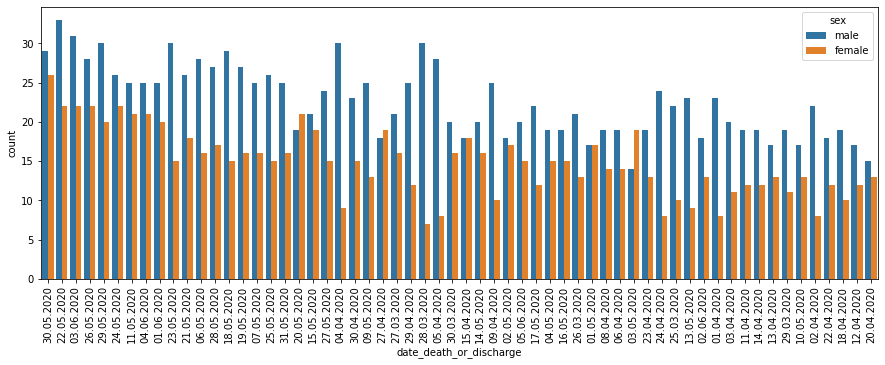

In [35]:
# lets try to check the distribution of top 60 date_death_or_discharge column with sex column
plt.figure(figsize=(15,5))
sns.countplot(x = 'date_death_or_discharge', data=df,hue='sex', order=df['date_death_or_discharge'].value_counts().index[:60])
plt.xticks(rotation=90)
plt.show()

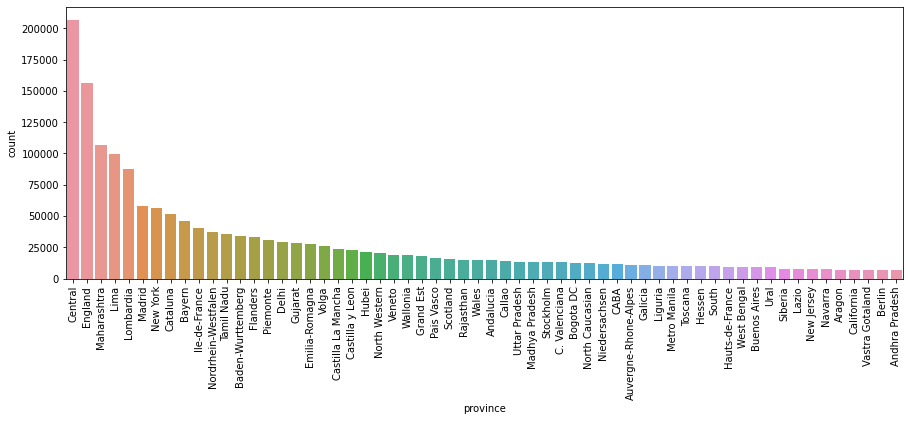

In [36]:
# lets try to check the distribution of top 60 province column
plt.figure(figsize=(15,5))
sns.countplot(x = 'province', data=df, order=df['province'].value_counts().index[:60])
plt.xticks(rotation=90)
plt.show()

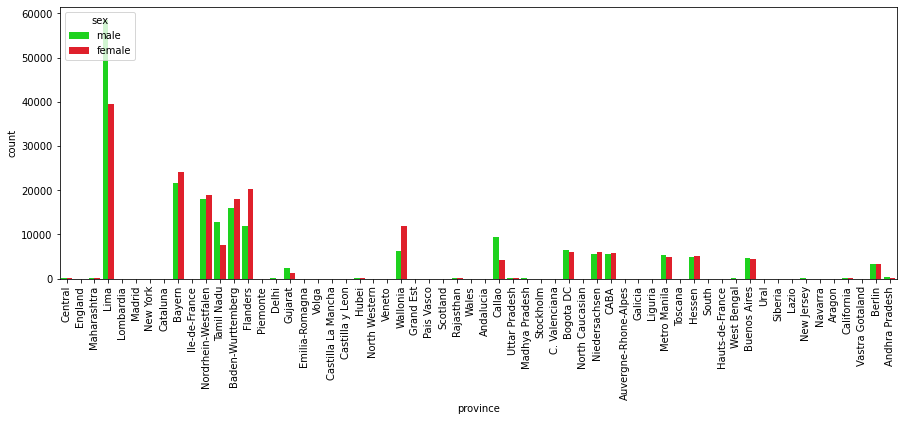

In [37]:
# lets try to check the distribution of top 60 province column with sex column
plt.figure(figsize=(15,5))
sns.countplot(x = 'province', data=df,hue='sex', order=df['province'].value_counts().index[:60],palette = ['#00F000','#FF000F'])
plt.xticks(rotation=90)
plt.show()

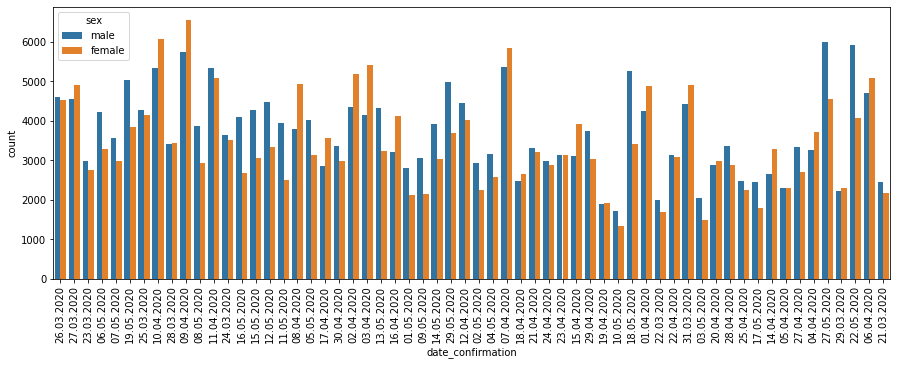

In [38]:
# lets try to check the distribution of top 60 province column
plt.figure(figsize=(15,5))
sns.countplot(x = 'date_confirmation',hue='sex', data=df, order=df['date_confirmation'].value_counts().index[:60])
plt.xticks(rotation=90)
plt.show()

## Feature Engineering,Data Preprocessing

In [39]:
# lets try to select a dataframe where our target outcome column not null
df1 = df[df.outcome.notnull()]

In [40]:
df1.head()

ID  age     sex        city   province    country   latitude  \
0      000-1-1  NaN    male    Shek Lei  Hong Kong      China  22.365019   
1     000-1-10   78    male  Vo Euganeo     Veneto      Italy  45.297748   
2    000-1-100   61  female         NaN        NaN  Singapore   1.353460   
113  000-1-101   28    male         NaN        NaN  Singapore   1.353460   
224  000-1-102   56  female         NaN        NaN  Singapore   1.353460   

      longitude geo_resolution date_onset_symptoms  ...  \
0    114.133808          point                 NaN  ...   
1     11.658382          point                 NaN  ...   
2    103.815100         admin0                 NaN  ...   
113  103.815100         admin0                 NaN  ...   
224  103.815100         admin0                 NaN  ...   

    date_death_or_discharge notes_for_discussion     location admin3 admin2  \
0                       NaN                  NaN     Shek Lei    NaN    NaN   
1                22.02.2020                  NaN  Vo' Euganeo    NaN    NaN   
2                17.02.2020                  NaN          NaN    NaN    NaN   
113              20.02.2020                  NaN          NaN    NaN    NaN   
224              02.03.2020                  NaN          NaN    NaN    NaN   

        admin1 country_new admin_id  data_moderator_initials  \
0    Hong Kong       China   8029.0                      NaN   
1       Veneto       Italy   8954.0                      NaN   
2          NaN   Singapore    200.0                      NaN   
113        NaN   Singapore    200.0                      NaN   
224        NaN   Singapore    200.0                      NaN   

    travel_history_binary  
0                     NaN  
1                     NaN  
2                     NaN  
113                   NaN  
224                   NaN  

[5 rows x 33 columns]

In [41]:
# lets try to check the counts of each values in target column outcome
df1['outcome'].value_counts()

Hospitalized                                                                202475
Recovered                                                                    93656
Deceased                                                                      5011
recovered                                                                     3659
died                                                                           916
Under treatment                                                                370
Receiving Treatment                                                            257
Alive                                                                          189
discharge                                                                      175
stable                                                                         156
stable condition                                                               133
https://www.mspbs.gov.py/covid-19.php                                          126
disc

In [42]:
# lets replace all the vaules with specific name
df1['outcome'] = df1['outcome'].str.replace('dead','death')
df1['outcome'] = df1['outcome'].str.replace('Dead','death')
df1['outcome'] = df1['outcome'].str.replace('died','death')
df1['outcome'] = df1['outcome'].str.replace('Died','death')
df1['outcome'] = df1['outcome'].str.replace('Death','death')
df1['outcome'] = df1['outcome'].str.replace('Deceased','death')
df1['outcome'] = df1['outcome'].str.replace('Under treatment','treatment')
df1['outcome'] = df1['outcome'].str.replace('Receiving Treatment','treatment')
df1['outcome'] = df1['outcome'].str.replace('stable','treatment')
df1['outcome'] = df1['outcome'].str.replace('Stable','treatment')
df1['outcome'] = df1['outcome'].str.replace('stable condition','treatment')
df1['outcome'] = df1['outcome'].str.replace('treatment condition','treatment')
df1['outcome'] = df1['outcome'].str.replace('Alive','discharge')
df1['outcome'] = df1['outcome'].str.replace('discharged','discharge')
df1['outcome'] = df1['outcome'].str.replace('Discharged','discharge')
df1['outcome'] = df1['outcome'].str.replace('Discharged from hospital','discharge')
df1['outcome'] = df1['outcome'].str.replace('Recovered','recovered')

In [43]:
# getting only values that are useful
out = ['Hospitalized','recovered','death','treatment','discharge']

In [44]:
# lets try to extract a dataframe with specific names
df2 = df1[df1['outcome'].isin(out)]

In [45]:
df2.head()

ID age     sex            city province    country   latitude  \
1     000-1-10  78    male      Vo Euganeo   Veneto      Italy  45.297748   
2    000-1-100  61  female             NaN      NaN  Singapore   1.353460   
113  000-1-101  28    male             NaN      NaN  Singapore   1.353460   
224  000-1-102  56  female             NaN      NaN  Singapore   1.353460   
335  000-1-103  79  female  Mei Hwan Drive      NaN  Singapore   1.353873   

      longitude geo_resolution date_onset_symptoms  ...  \
1     11.658382          point                 NaN  ...   
2    103.815100         admin0                 NaN  ...   
113  103.815100         admin0                 NaN  ...   
224  103.815100         admin0                 NaN  ...   
335  103.860478          point          30.01.2020  ...   

    date_death_or_discharge notes_for_discussion        location admin3  \
1                22.02.2020                  NaN     Vo' Euganeo    NaN   
2                17.02.2020                  NaN             NaN    NaN   
113              20.02.2020                  NaN             NaN    NaN   
224              02.03.2020                  NaN             NaN    NaN   
335              29.02.2020                  NaN  Mei Hwan Drive    NaN   

    admin2  admin1 country_new admin_id  data_moderator_initials  \
1      NaN  Veneto       Italy   8954.0                      NaN   
2      NaN     NaN   Singapore    200.0                      NaN   
113    NaN     NaN   Singapore    200.0                      NaN   
224    NaN     NaN   Singapore    200.0                      NaN   
335    NaN     NaN   Singapore   6077.0                      NaN   

    travel_history_binary  
1                     NaN  
2                     NaN  
113                   NaN  
224                   NaN  
335                   NaN  

[5 rows x 33 columns]

In [46]:
# now lets try to check the counts of target variable
df2['outcome'].value_counts()

Hospitalized    202475
recovered        97315
death             5999
treatment          947
discharge          483
Name: outcome, dtype: int64

Hospitalized    202475
recovered        97315
death             5999
treatment          947
discharge          483
Name: outcome, dtype: int64


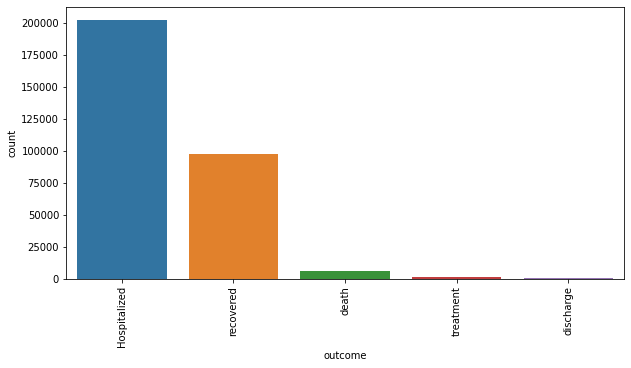

In [47]:
# lets try to check the distribution of target column outcome after preprocessing
print(df2['outcome'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x = 'outcome', data=df2,order=df2['outcome'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

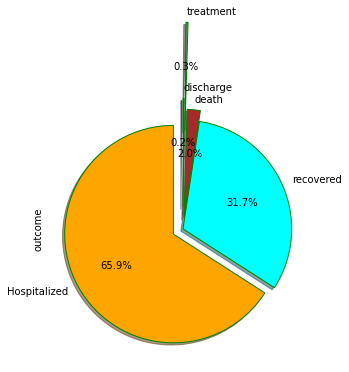

In [48]:
# Creating explode data
explode = (0.1, 0.0, 0.1, 0.9, 0.2)
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

df2['outcome'].value_counts().plot(kind="pie", figsize=(5,5), colormap="coolwarm",startangle=90,shadow=True,autopct="%1.1f%%",explode = explode,
                                   colors=colors,wedgeprops = wp)
plt.show()

In [49]:
df2

ID    age     sex               city      province  \
1        000-1-10     78    male         Vo Euganeo        Veneto   
2       000-1-100     61  female                NaN           NaN   
113     000-1-101     28    male                NaN           NaN   
224     000-1-102     56  female                NaN           NaN   
335     000-1-103     79  female     Mei Hwan Drive           NaN   
...           ...    ...     ...                ...           ...   
670224   005-6014    80-  female  Chittenden County       Vermont   
672529    005-809  60-69    male  Pennington County  South Dakota   
672651     005-82  90-99  female        King County    Washington   
672674    005-822     70    male   Multnomah County        Oregon   
673607    005-906  50-59    male   Snohomish County    Washington   

              country   latitude   longitude geo_resolution  \
1               Italy  45.297748   11.658382          point   
2           Singapore   1.353460  103.815100         admin0   
113         Singapore   1.353460  103.815100         admin0   
224         Singapore   1.353460  103.815100         admin0   
335         Singapore   1.353873  103.860478          point   
...               ...        ...         ...            ...   
670224  United States  44.461123  -73.081581         admin2   
672529  United States  44.003584 -102.826120         admin2   
672651  United States  47.491332 -121.803640         admin2   
672674  United States  45.546910 -122.414900         admin2   
673607  United States  48.048180 -121.696000         admin2   

       date_onset_symptoms  ... date_death_or_discharge notes_for_discussion  \
1                      NaN  ...              22.02.2020                  NaN   
2                      NaN  ...              17.02.2020                  NaN   
113                    NaN  ...              20.02.2020                  NaN   
224                    NaN  ...              02.03.2020                  NaN   
335             30.01.2020  ...              29.02.2020                  NaN   
...                    ...  ...                     ...                  ...   
670224                 NaN  ...              19.03.2020                  NaN   
672529                 NaN  ...                     NaN                  NaN   
672651                 NaN  ...              03.03.2020                  NaN   
672674                 NaN  ...                     NaN                  NaN   
673607                 NaN  ...                     NaN                  NaN   

              location admin3             admin2        admin1    country_new  \
1          Vo' Euganeo    NaN                NaN        Veneto          Italy   
2                  NaN    NaN                NaN           NaN      Singapore   
113                NaN    NaN                NaN           NaN      Singapore   
224                NaN    NaN                NaN           NaN      Singapore   
335     Mei Hwan Drive    NaN                NaN           NaN      Singapore   
...                ...    ...                ...           ...            ...   
670224             NaN    NaN  Chittenden County       Vermont  United States   
672529             NaN    NaN  Pennington County  South Dakota  United States   
672651             NaN    NaN        King County    Washington  United States   
672674             NaN    NaN   Multnomah County        Oregon  United States   
673607             NaN    NaN   Snohomish County    Washington  United States   

       admin_id  data_moderator_initials travel_history_binary  
1        8954.0                      NaN                   NaN  
2         200.0                      NaN                   NaN  
113       200.0                      NaN                   NaN  
224       200.0                      NaN                   NaN  
335      6077.0                      NaN                   NaN  
...         ...                      ...                   ...  
670224   2239.0                      NaN

## Feature Selection

In [50]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values 
# and type against each column.
stats = []
for col in df2.columns:
    stats.append((col, df2[col].nunique(), df2[col].isnull().sum() * 100 / df2.shape[0], df2[col].value_counts(normalize=True, dropna=False).values[0] * 100, df2[col].dtype))
    ## Exploratory Data Anaylsis
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'percentage high one category values', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  \
21        sequence_available              3                     99.998698   
16  reported_market_exposure              3                     99.994792   
26                    admin3             11                     99.992513   
19           chronic_disease             66                     99.959312   
24      notes_for_discussion             58                     99.951500   
13            lives_in_Wuhan              2                     99.944014   
10   date_admission_hospital             61                     99.903326   
14      travel_history_dates             67                     99.900071   
27                    admin2             66                     99.846689   
12                  symptoms            114                     99.845713   
15   travel_history_location            148                     99.687194   
23   date_death_or_discharge            135                     99.612654   
9        date_onset_symptoms            147                     98.848704   
25                  location             63                     97.864064   
17    additional_information           6398                     93.953173   
1                        age            211                     88.796266   
28                    admin1             92                     87.728949   
2                        sex              2                     87.598749   
3                       city           2344                     14.378668   
20                    source           3075                      8.968846   
31   data_moderator_initials              3                      1.983927   
29               country_new             48                      1.147064   
4                   province            207                      0.292625   
32     travel_history_binary              2                      0.102207   
11         date_confirmation            137                      0.024087   
5                    country             51                      0.000651   
22                   outcome              5                      0.000000   
18    chronic_disease_binary              2                      0.000000   
8             geo_resolution              5                      0.000000   
7                  longitude           2181                      0.000000   
6                   latitude           2188                      0.000000   
30                  admin_id           2414                      0.000000   
0                         ID         307219                      0.000000   

    percentage high one category values     type  
21                            99.998698   object  
16                            99.994792   object  
26                            99.992513   object  
19                            99.959312   object  
24                            99.951500   object  
13                            99.944014   object  
10                            99.903326   object  
14                            99.900071   object  
27                            99.846689   object  
12                            99.845713   object  
15                            99.687194   object  
23                            99.612654   object  
9                             98.848704   object  
25                            97.864064   object  
17                            93.953173   object  
1                             88.796266   object  
28                            87.728949   object  
2                             87.598749   object  
3                             18.285978   object  
20                             8.968846   object  
31                            98.014771   object  
29                            98.014771   object  
4                             34.670707   object  
32                            99.542021   object  
11                             6.586832   object  
5                             98.014771   object  
22                       

In [51]:
# lets try to remove columns with percentage of high one category values and high missing values.
# Removing colums with 90% features with one category only and 90% features with missing values
good_cols = list(df2.columns)
for col in df2.columns:
    
    #remove columns with high NA rate
    na_rate = df2[col].isnull().sum()/ df2.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = df2[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > 0.9 and unbalanced_rate > 0.9:
        good_cols.remove(col)         

In [52]:
# extract a good columns
df2 = df2[good_cols]

In [53]:
df2.head()

ID age     sex            city province    country   latitude  \
1     000-1-10  78    male      Vo Euganeo   Veneto      Italy  45.297748   
2    000-1-100  61  female             NaN      NaN  Singapore   1.353460   
113  000-1-101  28    male             NaN      NaN  Singapore   1.353460   
224  000-1-102  56  female             NaN      NaN  Singapore   1.353460   
335  000-1-103  79  female  Mei Hwan Drive      NaN  Singapore   1.353873   

      longitude geo_resolution date_confirmation  chronic_disease_binary  \
1     11.658382          point        21.02.2020                   False   
2    103.815100         admin0        14.02.2020                   False   
113  103.815100         admin0        14.02.2020                   False   
224  103.815100         admin0        14.02.2020                   False   
335  103.860478          point        14.02.2020                   False   

                                                source    outcome  admin1  \
1    https://www.corriere.it/cronache/20_febbraio_2...      death  Veneto   
2    https://www.channelnewsasia.com/news/singapore...  discharge     NaN   
113  https://www.channelnewsasia.com/news/singapore...  discharge     NaN   
224  https://www.channelnewsasia.com/news/singapore...  discharge     NaN   
335  https://www.moh.gov.sg/news-highlights/details...  discharge     NaN   

    country_new  admin_id data_moderator_initials travel_history_binary  
1         Italy    8954.0                     NaN                   NaN  
2     Singapore     200.0                     NaN                   NaN  
113   Singapore     200.0                     NaN                   NaN  
224   Singapore     200.0                     NaN                   NaN  
335   Singapore    6077.0                     NaN                   NaN

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307219 entries, 1 to 673607
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       307219 non-null  object 
 1   age                      34420 non-null   object 
 2   sex                      38099 non-null   object 
 3   city                     263045 non-null  object 
 4   province                 306320 non-null  object 
 5   country                  307217 non-null  object 
 6   latitude                 307219 non-null  float64
 7   longitude                307219 non-null  float64
 8   geo_resolution           307219 non-null  object 
 9   date_confirmation        307145 non-null  object 
 10  chronic_disease_binary   307219 non-null  bool   
 11  source                   279665 non-null  object 
 12  outcome                  307219 non-null  object 
 13  admin1                   37699 non-null   object 
 14  coun

In [55]:
df2.isnull().sum()

ID                              0
age                        272799
sex                        269120
city                        44174
province                      899
country                         2
latitude                        0
longitude                       0
geo_resolution                  0
date_confirmation              74
chronic_disease_binary          0
source                      27554
outcome                         0
admin1                     269520
country_new                  3524
admin_id                        0
data_moderator_initials      6095
travel_history_binary         314
dtype: int64

In [56]:
# drop the unnecessary columns that are not useful for our anaylsis
df2.drop(['ID','source','admin1','admin_id','geo_resolution','country_new','data_moderator_initials'], axis = 1, inplace=True)

In [57]:
# lets look the data
df2.head()

age     sex            city province    country   latitude   longitude  \
1    78    male      Vo Euganeo   Veneto      Italy  45.297748   11.658382   
2    61  female             NaN      NaN  Singapore   1.353460  103.815100   
113  28    male             NaN      NaN  Singapore   1.353460  103.815100   
224  56  female             NaN      NaN  Singapore   1.353460  103.815100   
335  79  female  Mei Hwan Drive      NaN  Singapore   1.353873  103.860478   

    date_confirmation  chronic_disease_binary    outcome travel_history_binary  
1          21.02.2020                   False      death                   NaN  
2          14.02.2020                   False  discharge                   NaN  
113        14.02.2020                   False  discharge                   NaN  
224        14.02.2020                   False  discharge                   NaN  
335        14.02.2020                   False  discharge                   NaN

In [58]:
# lets try to preprocessing on date_confirmation column
df2['date_confirmation'] = df2['date_confirmation'].str.replace('.','/')

In [59]:
# convert data_confirmation into datetime
df2['date_confirmation'] = pd.to_datetime(df2['date_confirmation'],dayfirst=True, errors='coerce')

In [60]:
# lets try to add new column of data_confirmation_day and month
df2['date_confirmation_day'] = df2['date_confirmation'].dt.day
df2['date_confirmation_month'] = df2['date_confirmation'].dt.month
df2.drop('date_confirmation', axis =1, inplace=True)

In [61]:
df2.head()

age     sex            city province    country   latitude   longitude  \
1    78    male      Vo Euganeo   Veneto      Italy  45.297748   11.658382   
2    61  female             NaN      NaN  Singapore   1.353460  103.815100   
113  28    male             NaN      NaN  Singapore   1.353460  103.815100   
224  56  female             NaN      NaN  Singapore   1.353460  103.815100   
335  79  female  Mei Hwan Drive      NaN  Singapore   1.353873  103.860478   

     chronic_disease_binary    outcome travel_history_binary  \
1                     False      death                   NaN   
2                     False  discharge                   NaN   
113                   False  discharge                   NaN   
224                   False  discharge                   NaN   
335                   False  discharge                   NaN   

     date_confirmation_day  date_confirmation_month  
1                     21.0                      2.0  
2                     14.0                      2.0  
113                   14.0                      2.0  
224                   14.0                      2.0  
335                   14.0                      2.0

In [62]:
# lets try to preprocessing on age column
a = []
for i in df2['age'].index:
    s = str(df2['age'][i]).split('-')
    a.append((i,s))
    
for i, j in a:
    if len(j)>1:
        if '' in j:
            test_list = [int(k) for k in j[:-1]]
            df2['age'][i] = test_list[0]
        else:
            test_list = [int(k) for k in j]
            df2['age'][i] = sum(test_list)//2
    else:
        if 'nan' in j:
            pass
        else:    
            test_list = [float(k) for k in j]
            df2['age'][i] = test_list[0]

In [63]:
# lets try to convert the convert
df2['age'] = df2['age'].astype(float)
df2['chronic_disease_binary'] = [str(i) for i in df2['chronic_disease_binary']]
df2['travel_history_binary'] = [str(i) for i in df2['travel_history_binary']]

## Handling Missing Values

In [64]:
# lets try to handle the missing values of catagorical with Uknown and numeric with avearge (mean)
for i in list(df2.columns):
    if df2[i].dtype == 'object':
        df2[i].fillna('Unknown',inplace=True)
    else:
        df2[i].fillna(df2[i].mean(),inplace=True)

In [65]:
# lets try to look the clean data
df2.head()

age     sex            city province    country   latitude   longitude  \
1    78.0    male      Vo Euganeo   Veneto      Italy  45.297748   11.658382   
2    61.0  female         Unknown  Unknown  Singapore   1.353460  103.815100   
113  28.0    male         Unknown  Unknown  Singapore   1.353460  103.815100   
224  56.0  female         Unknown  Unknown  Singapore   1.353460  103.815100   
335  79.0  female  Mei Hwan Drive  Unknown  Singapore   1.353873  103.860478   

    chronic_disease_binary    outcome travel_history_binary  \
1                    False      death                   nan   
2                    False  discharge                   nan   
113                  False  discharge                   nan   
224                  False  discharge                   nan   
335                  False  discharge                   nan   

     date_confirmation_day  date_confirmation_month  
1                     21.0                      2.0  
2                     14.0                      2.0  
113                   14.0                      2.0  
224                   14.0                      2.0  
335                   14.0                      2.0

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307219 entries, 1 to 673607
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      307219 non-null  float64
 1   sex                      307219 non-null  object 
 2   city                     307219 non-null  object 
 3   province                 307219 non-null  object 
 4   country                  307219 non-null  object 
 5   latitude                 307219 non-null  float64
 6   longitude                307219 non-null  float64
 7   chronic_disease_binary   307219 non-null  object 
 8   outcome                  307219 non-null  object 
 9   travel_history_binary    307219 non-null  object 
 10  date_confirmation_day    307219 non-null  float64
 11  date_confirmation_month  307219 non-null  float64
dtypes: float64(5), object(7)
memory usage: 40.5+ MB


In [67]:
# check the missing values
df2.isnull().sum()

age                        0
sex                        0
city                       0
province                   0
country                    0
latitude                   0
longitude                  0
chronic_disease_binary     0
outcome                    0
travel_history_binary      0
date_confirmation_day      0
date_confirmation_month    0
dtype: int64

## Importing Libraries

In [68]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#import for preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

## Label Encoding

In [69]:
# label encoding
labelEnc = LabelEncoder()
for i in list(df2.columns):
    if df2[i].dtype == 'object':
        df2[i] = labelEnc.fit_transform(df2[i])

## Correlation

In [70]:
corr = df2.corr()
corr

age       sex      city  province   country  \
age                      1.000000  0.002390 -0.004834  0.038921  0.134067   
sex                      0.002390  1.000000 -0.189216  0.100231  0.227396   
city                    -0.004834 -0.189216  1.000000 -0.147087  0.010794   
province                 0.038921  0.100231 -0.147087  1.000000 -0.001461   
country                  0.134067  0.227396  0.010794 -0.001461  1.000000   
latitude                -0.021716 -0.353800  0.118841 -0.331227 -0.149685   
longitude                0.081717  0.285267 -0.069624  0.051833  0.439667   
chronic_disease_binary   0.104667  0.052976  0.008331 -0.001068  0.060462   
outcome                  0.037032 -0.139379 -0.045798  0.004318  0.106043   
travel_history_binary    0.075468  0.114757  0.003665  0.007398 -0.019886   
date_confirmation_day   -0.005814 -0.011830  0.049578 -0.008371 -0.047456   
date_confirmation_month -0.076667 -0.166115 -0.023644  0.008408 -0.167861   

                         latitude  longitude  chronic_disease_binary  \
age                     -0.021716   0.081717                0.104667   
sex                     -0.353800   0.285267                0.052976   
city                     0.118841  -0.069624                0.008331   
province                -0.331227   0.051833               -0.001068   
country                 -0.149685   0.439667                0.060462   
latitude                 1.000000  -0.021054               -0.011082   
longitude               -0.021054   1.000000                0.076677   
chronic_disease_binary  -0.011082   0.076677                1.000000   
outcome                 -0.043518   0.046404                0.004778   
travel_history_binary   -0.021800   0.046601                0.252758   
date_confirmation_day   -0.016321  -0.026101               -0.001775   
date_confirmation_month  0.031724  -0.075269               -0.080521   

                          outcome  travel_history_binary  \
age                      0.037032               0.075468   
sex                     -0.139379               0.114757   
city                    -0.045798               0.003665   
province                 0.004318               0.007398   
country                  0.106043              -0.019886   
latitude                -0.043518              -0.021800   
longitude                0.046404               0.046601   
chronic_disease_binary   0.004778               0.252758   
outcome                  1.000000               0.035702   
travel_history_binary    0.035702               1.000000   
date_confirmation_day    0.063540              -0.016437   
date_confirmation_month  0.087160              -0.313005   

                         date_confirmation_day  date_confirmation_month  
age                                  -0.005814                -0.076667  
sex                                  -0.011830                -0.166115  
city                                  0.049578                -0.023644  
province                             -0.008371                 0.008408  
country                              -0.047456                -0.167861  
latitude                             -0.016321                 0.031724  
longitude                            -0.026101                -0.075269  
chronic_disease_binary               -0.001775                -0.080521  
outcome                               0.063540                 0.087160  
travel_history_binary                -0.016437                -0.313005  
date_confirmation_day                 1.000000                -0.184021  
date_confirmation_month              -0.184021                 1.000000

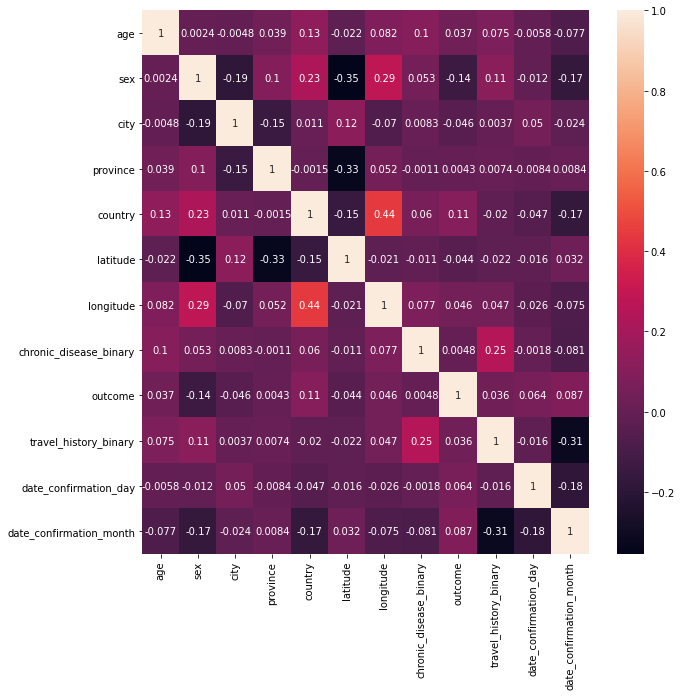

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [72]:
print(corr["outcome"].sort_values(ascending=False))

outcome                    1.000000
country                    0.106043
date_confirmation_month    0.087160
date_confirmation_day      0.063540
longitude                  0.046404
age                        0.037032
travel_history_binary      0.035702
chronic_disease_binary     0.004778
province                   0.004318
latitude                  -0.043518
city                      -0.045798
sex                       -0.139379
Name: outcome, dtype: float64


## Extract Dependent and Independent Variables

In [73]:
X = df2.drop('outcome', axis = 1)
Y = df2['outcome']

In [74]:
X

age  sex  city  province  country   latitude   longitude  \
1       78.0    2  2284       198       27  45.297748   11.658382   
2       61.0    1  2233       193       38   1.353460  103.815100   
113     28.0    2  2233       193       38   1.353460  103.815100   
224     56.0    1  2233       193       38   1.353460  103.815100   
335     79.0    1  1361       193       38   1.353873  103.860478   
...      ...  ...   ...       ...      ...        ...         ...   
670224  80.0    1   500       199       47  44.461123  -73.081581   
672529  64.0    2  1666       178       47  44.003584 -102.826120   
672651  94.0    1  1076       201       47  47.491332 -121.803640   
672674  70.0    2  1406       151       47  45.546910 -122.414900   
673607  54.0    2  2053       201       47  48.048180 -121.696000   

        chronic_disease_binary  travel_history_binary  date_confirmation_day  \
1                            0                      2                   21.0   
2                            0                      2                   14.0   
113                          0                      2                   14.0   
224                          0                      2                   14.0   
335                          0                      2                   14.0   
...                        ...                    ...                    ...   
670224                       0                      0                   18.0   
672529                       0                      0                   10.0   
672651                       0                      0                    4.0   
672674                       0                      0                   10.0   
673607                       0                      0                   11.0   

        date_confirmation_month  
1                           2.0  
2                           2.0  
113                         2.0  
224                         2.0  
335                         2.0  
...                         ...  
670224                      3.0  
672529                      3.0  
672651                      3.0  
672674                      3.0  
673607                      3.0  

[307219 rows x 11 columns]

In [75]:
Y

1         1
2         2
113       2
224       2
335       2
         ..
670224    1
672529    1
672651    1
672674    1
673607    3
Name: outcome, Length: 307219, dtype: int32

## Split Train Test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [77]:
print(X_train.shape)
print(X_test.shape)

(245775, 11)
(61444, 11)


## Standard Scaling

In [78]:
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train) 
X_test= st_x.transform(X_test) 

In [79]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## Cross Validation

In [80]:
kfold = KFold(n_splits=10, random_state=42, shuffle= False)## Exploratory Data Anaylsis

## Train and Evalute Models

In [81]:
def train_evalute_model(model, model_name, X_train, X_test, y_train, y_test):
    '''Method to train and predict the test data, and calculate evalution metrices'''
    
    # train the model
    model.fit(X_train, y_train)

    
    # predict the train and test model
    #y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_train)
    scores = cross_val_score(model, X_train, y_train, cv=kfold) 
    
    # calculate the accuracy
    result = {}
    result['Model_name'] = model_name
    
    result['Accuracy'] = accuracy_score(y_train, y_pred_test)
    result['Precision'] = precision_score(y_train, y_pred_test,average='micro')
    result['Recall'] = recall_score(y_train, y_pred_test,average='micro')
    result['F1'] = f1_score(y_train, y_pred_test,average='micro')
    result['Classification Report'] = classification_report(y_train, y_pred_test)
    result['Confusion Matrix'] = confusion_matrix(y_train, y_pred_test)
    result['Cross Validation Result'] = np.mean(scores)
    print(result)
    
    
    return result

In [82]:
results_train = []
# LR
results_train.append(train_evalute_model(LogisticRegression(random_state=0), 'LR', X_train, X_test, y_train, y_test))
# Random Forest
results_train.append(train_evalute_model(RandomForestClassifier(n_estimators=100, random_state=0), 'RF', X_train, X_test, y_train, y_test))
# DT
results_train.append(train_evalute_model(DecisionTreeClassifier(random_state=0), 'DT', X_train, X_test, y_train, y_test))

{'Model_name': 'LR', 'Accuracy': 0.693532702675211, 'Precision': 0.693532702675211, 'Recall': 0.693532702675211, 'F1': 0.693532702675211, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.70      0.95      0.81    161965\n           1       0.61      0.06      0.10      4824\n           2       0.75      0.54      0.63       388\n           3       0.63      0.21      0.31     77836\n           4       0.71      0.72      0.71       762\n\n    accuracy                           0.69    245775\n   macro avg       0.68      0.49      0.51    245775\nweighted avg       0.68      0.69      0.64    245775\n', 'Confusion Matrix': array([[153148,     17,      5,   8742,     53],
       [  3811,    273,     13,    706,     21],
       [    24,     17,    210,     37,    100],
       [ 61350,    140,     18,  16276,     52],
       [   159,      0,     33,     24,    546]], dtype=int64), 'Cross Validation Result': 0.6931176951069629}
{'Model

## Result on Training

In [83]:
results_train = pd.DataFrame(results_train)
results_train.to_csv('results_train.csv')
results_train

Model_name  Accuracy  Precision    Recall        F1  \
0         LR  0.693533   0.693533  0.693533  0.693533   
1         RF  0.828758   0.828758  0.828758  0.828758   
2         DT  0.828774   0.828774  0.828774  0.828774   

                               Classification Report  \
0                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   

                                    Confusion Matrix  Cross Validation Result  
0  [[153148, 17, 5, 8742, 53], [3811, 273, 13, 70...                 0.693118  
1  [[151829, 19, 0, 10117, 0], [2947, 1150, 0, 72...                 0.815543  
2  [[152043, 4, 0, 9918, 0], [2968, 1169, 0, 686,...                 0.814192

In [84]:
def test_evalute_model(model, model_name, X_train, X_test, y_train, y_test):
    '''Method to train and predict the test data, and calculate evalution metrices'''
    
    # train the model
    model.fit(X_train, y_train)

    
    # predict the train and test model
    #y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    scores = cross_val_score(model, X_test, y_test, cv=kfold)
    
    # calculate the accuracy
    result = {}
    result['Model_name'] = model_name
    
    result['Accuracy'] = accuracy_score(y_test, y_pred_test)
    result['Precision'] = precision_score(y_test, y_pred_test, average='micro')
    result['Recall'] = recall_score(y_test, y_pred_test,average='micro')
    result['F1'] = f1_score(y_test, y_pred_test,average='micro')
    result['Classification Report'] = classification_report(y_test, y_pred_test)
    result['Confusion Matrix'] = confusion_matrix(y_test, y_pred_test)
    result['Cross Validation Result'] = np.mean(scores)
    print(result)
    
    
    return result

In [85]:
results = []
# LR
results.append(test_evalute_model(LogisticRegression(random_state=0), 'LR', X_train, X_test, y_train, y_test))
# Random Forest
results.append(test_evalute_model(RandomForestClassifier(n_estimators=100, random_state=0), 'RF', X_train, X_test, y_train, y_test))
# DT
results.append(test_evalute_model(DecisionTreeClassifier(random_state=0), 'DT', X_train, X_test, y_train, y_test))

{'Model_name': 'LR', 'Accuracy': 0.6936560119783868, 'Precision': 0.6936560119783868, 'Recall': 0.6936560119783868, 'F1': 0.6936560119783868, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.70      0.95      0.81     40510\n           1       0.50      0.05      0.10      1175\n           2       0.79      0.52      0.62        95\n           3       0.63      0.21      0.31     19479\n           4       0.70      0.77      0.73       185\n\n    accuracy                           0.69     61444\n   macro avg       0.67      0.50      0.51     61444\nweighted avg       0.68      0.69      0.64     61444\n', 'Confusion Matrix': array([[38309,     2,     0,  2183,    16],
       [  955,    64,     6,   144,     6],
       [    5,     4,    49,     8,    29],
       [15357,    54,     0,  4057,    11],
       [   29,     3,     7,     4,   142]], dtype=int64), 'Cross Validation Result': 0.6949419465775021}
{'Model_name': 'RF', 'Accura

## Result on Testing

In [86]:
results = pd.DataFrame(results)
results.to_csv('results.csv')
results

Model_name  Accuracy  Precision    Recall        F1  \
0         LR  0.693656   0.693656  0.693656  0.693656   
1         RF  0.814612   0.814612  0.814612  0.814612   
2         DT  0.812561   0.812561  0.812561  0.812561   

                               Classification Report  \
0                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   

                                    Confusion Matrix  Cross Validation Result  
0  [[38309, 2, 0, 2183, 16], [955, 64, 6, 144, 6]...                 0.694942  
1  [[37737, 24, 0, 2749, 0], [782, 136, 1, 254, 2...                 0.800794  
2  [[37750, 41, 0, 2719, 0], [779, 145, 1, 247, 3...                 0.797295

## Comparing Models

In [87]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=False)
colors = ['lightslategray',] * 5
colors[4] = 'crimson'
fig = go.Figure()
fig.add_trace(go.Bar(name='Train Accuracy', x=results_train['Model_name'], y=results_train['Accuracy']))
fig.add_trace(go.Bar(name='Test Accuracy', x=results['Model_name'], y=results['Accuracy']))
fig.layout = dict(title = 'Models Accuracy Comparison',xaxis= dict(title= 'Model Name',ticklen= 2,zeroline= False))
#fig = dict(data = traces, layout = layout)
fig.show()

In [88]:
fig = go.Figure()
fig.add_trace(go.Bar(name='Train F1', x=results_train['Model_name'], y=results_train['F1']))
fig.add_trace(go.Bar(name='Test F1', x=results['Model_name'], y=results['F1']))
fig.layout = dict(title = 'Models F1 Score Comparison',xaxis= dict(title= 'Model Name',ticklen= 2,zeroline= False))
fig.show()

## Confusion Matrix (Models)

In [116]:
model0 = results.iloc[:,-2][0]
model1 = results.iloc[:,-2][1]
model2 = results.iloc[:,-2][2]

cr_model0 = results.iloc[:,-3][0]
cr_model1 = results.iloc[:,-3][1]
cr_model2 = results.iloc[:,-3][2]


 LR : Logistic Regression Confusion Matrix




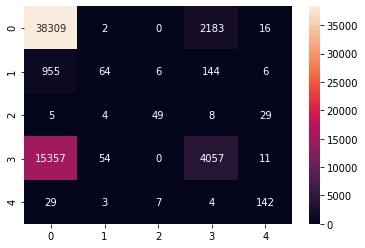

In [90]:
print("\n",results.iloc[:,0][0],": Logistic Regression Confusion Matrix\n\n")
sns.heatmap(model0, annot=True,fmt='d')
plt.show()

In [120]:
print("\n=====",results.iloc[:,0][0],": Logistic Regression Classification Report=====\n\n")
print(cr_model0)


===== LR : Logistic Regression Classification Report=====


              precision    recall  f1-score   support

           0       0.70      0.95      0.81     40510
           1       0.50      0.05      0.10      1175
           2       0.79      0.52      0.62        95
           3       0.63      0.21      0.31     19479
           4       0.70      0.77      0.73       185

    accuracy                           0.69     61444
   macro avg       0.67      0.50      0.51     61444
weighted avg       0.68      0.69      0.64     61444




 RF : Random Forest Confusion Matrix




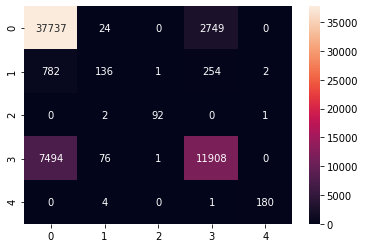

In [91]:
print("\n",results.iloc[:,0][1],": Random Forest Confusion Matrix\n\n")
sns.heatmap(model1, annot=True,fmt='d')
plt.show()

In [121]:
print("\n=====",results.iloc[:,0][1],": Random Forest Classification Report=====\n\n")
print(cr_model1)


===== RF : Random Forest Classification Report=====


              precision    recall  f1-score   support

           0       0.82      0.93      0.87     40510
           1       0.56      0.12      0.19      1175
           2       0.98      0.97      0.97        95
           3       0.80      0.61      0.69     19479
           4       0.98      0.97      0.98       185

    accuracy                           0.81     61444
   macro avg       0.83      0.72      0.74     61444
weighted avg       0.81      0.81      0.80     61444




 DT : Decision Tree Confusion Matrix\n



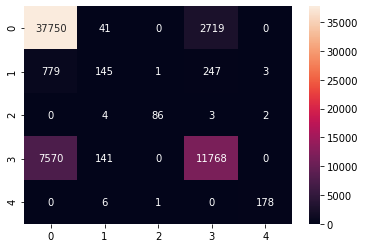

In [92]:
print("\n",results.iloc[:,0][2],": Decision Tree Confusion Matrix\\n\n")
sns.heatmap(model2, annot=True,fmt='d')
plt.show()

In [122]:
print("\n=====",results.iloc[:,0][2],": Decision Tree Classification Report=====\n\n")
print(cr_model2)


===== DT : Decision Tree Classification Report=====


              precision    recall  f1-score   support

           0       0.82      0.93      0.87     40510
           1       0.43      0.12      0.19      1175
           2       0.98      0.91      0.94        95
           3       0.80      0.60      0.69     19479
           4       0.97      0.96      0.97       185

    accuracy                           0.81     61444
   macro avg       0.80      0.71      0.73     61444
weighted avg       0.81      0.81      0.80     61444



## GridSearchCV (Hyperparameters Tuning)

In [109]:
#Grid Search
model_params = {
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators': [5,10,15]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1, 5, 10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':["gini", "entropy"],
            'splitter':["best", "random"]
        }
        
    }
}


In [110]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, scoring='accuracy')
    clf.fit(X_train,y_train)
    predict = clf.predict(X_test)
    accuracy = accuracy_score(predict,y_test)*100
    
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
        'testing_accuracy':accuracy
    })

In [111]:
df = pd.DataFrame(scores)

In [112]:
# best parameters for each model
print(scores)

[{'model': 'random_forest', 'best_score': 0.8138948225002542, 'best_params': {'n_estimators': 15}, 'testing_accuracy': 81.3602630037107}, {'model': 'logistic_regression', 'best_score': 0.6933496083816498, 'best_params': {'C': 5}, 'testing_accuracy': 69.36071870320943}, {'model': 'decision_tree', 'best_score': 0.813292645712542, 'best_params': {'criterion': 'entropy', 'splitter': 'best'}, 'testing_accuracy': 81.26586810754507}]


In [113]:
df 

model  best_score  \
0        random_forest    0.813895   
1  logistic_regression    0.693350   
2        decision_tree    0.813293   

                                    best_params  testing_accuracy  
0                          {'n_estimators': 15}         81.360263  
1                                      {'C': 5}         69.360719  
2  {'criterion': 'entropy', 'splitter': 'best'}         81.265868

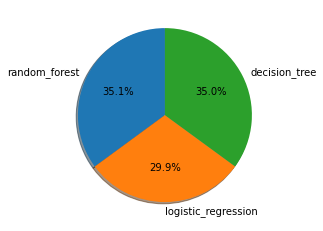

In [114]:
plt.pie(df['best_score'],labels=df['model'],startangle=90,shadow=True,autopct="%1.1f%%")
plt.show()